<a href="https://colab.research.google.com/github/Khairunnisah19/khairunnisah19.github.io/blob/main/Sentiment_Analysis_Review_Resep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Install library yg digunakan**

In [1]:
import numpy as np # Untuk Komputasi Numerik
import pandas as pd # Untuk Manipulasi Data
import matplotlib.pyplot as plt # Untuk Memvisualisasikan Data
import seaborn as sns # Untuk Memvisualisasikan Data
#import warnings
#warnings.filterwarnings("ignore") # Untuk Mengabaikan Warnings

1. install library stopwood
2. melakukan case folding untuk lowercase
3. removing number
4. removing punctuation
5. removing whitespace
6. separating sentence dengan split method
7. tokenizing dengan ntlk
8. filtering dengan nltk

**2. Menampilkan dataset**

In [2]:
df = pd.read_csv("sample_data/Recipe Reviews and User Feedback Dataset.csv")
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


**3. Pre-Processing Data**

In [3]:
#import textblob
import textblob
from textblob import TextBlob


#import stopword
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

review = df["text"].astype("string")
review.head()

,text
0,"I tweaked it a little, removed onions because ..."
1,Bush used to have a white chili bean and it ma...
2,I have a very complicated white chicken chili ...
3,"In your introduction, you mentioned cream chee..."
4,Wonderful! I made this for a &#34;Chili/Stew&#...


In [4]:
def pre_process(Review_Text):
    # Case Folding: Lowercase
    Review_Text = str(review).lower()

    # Case Folding: Removing Punctuation
    #Review_Text = Review_Text.translate(str.maketrans("","",Review_Text.punctuation))

    #Case Folding: Removing Whitespace
    Review_Text = Review_Text.strip()

    #Separating Sentences with Split () Method
    pisah = Review_Text.split()

    #Tokenizing: Word Tokenizing Using NLTK Module
    #tokens = nltk.tokenize.word_tokenize(Review_Text)

    #Filtering using NLTK
    #listStopword =  set(stopwords.words('indonesian'))

    #removed = []
    #for t in tokens:
    #  if t not in listStopword:
    #    removed.append(t)

    return Review_Text

df['review'] = review.apply(lambda x:pre_process(x))
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,review
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ...","0 i tweaked it a little, removed onions..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...,"0 i tweaked it a little, removed onions..."
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...,"0 i tweaked it a little, removed onions..."
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...","0 i tweaked it a little, removed onions..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,"0 i tweaked it a little, removed onions..."


**6. Proses PeLabelan**

In [20]:
# Perform a simple sentiment analysis
data_review = list(df['text'].astype(str))
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(review)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')
df.head()

Hasil Analisis Data:
Positif = 16148
Netral = 1001
Negatif = 1033

Total Data : 18182


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,review
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ...","0 i tweaked it a little, removed onions..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...,"0 i tweaked it a little, removed onions..."
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...,"0 i tweaked it a little, removed onions..."
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...","0 i tweaked it a little, removed onions..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,"0 i tweaked it a little, removed onions..."


**Menambahkan kolom Status Sentimen (Positif/Netral/Negatif)**

In [25]:
df['klasifikasi'] = status
df.tail()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,review,klasifikasi
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...,"0 i tweaked it a little, removed onions...",Positif
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...,"0 i tweaked it a little, removed onions...",Positif
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...,"0 i tweaked it a little, removed onions...",Positif
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...,"0 i tweaked it a little, removed onions...",Positif
18181,118,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_262637,u_1oKW6W12cOLxiMzjA7j8nTqwFWG,nopalito,1,1622717625,0,1,0,5,193,"OMG, you must make this cake. I made it for my...","0 i tweaked it a little, removed onions...",Positif


**Data Visualization**

In [ ]:
status = pd.DataFrame({'klasifikasi': status})
data['klasifikasi'] = status
data.tail()

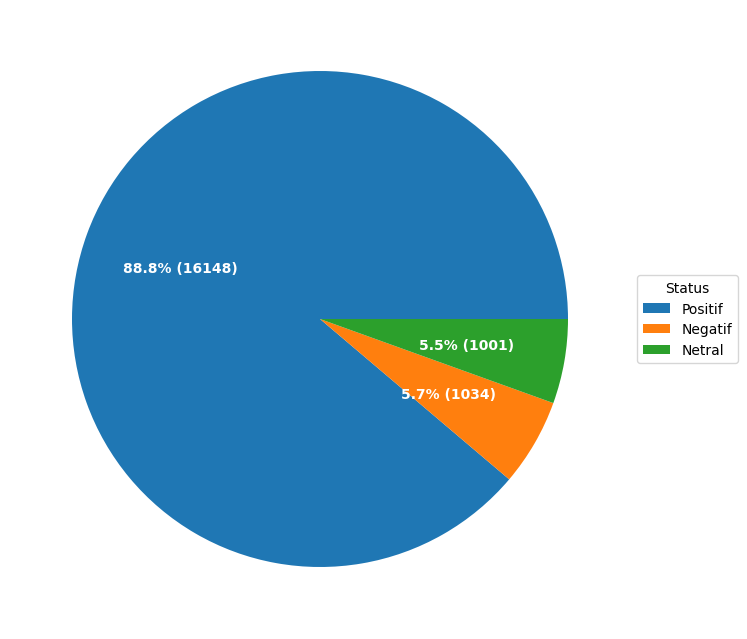

In [27]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

**Kesimpulan :**

> Terdapat lebih banyak sentimen positif untuk resep masakan, dibandingkan dengan review negatif dan netral



# **Klasifikasi Data Dengan Metode Naive Bayes Classifier**

**Saving Into New File**

In [ ]:
df.to_csv('labeled_text.csv', encoding='utf8', index=False)
